In [1]:
%matplotlib inline
import sympy
import numpy as np
from sympy import Eq, plot_implicit, Matrix, plot, symbols, latex
from sympy.core import sympify
from sympy.geometry.point import Point, Point2D, Point3D
from sympy.geometry.line import Line
from sympy.core.symbol import _symbol
from sympy import pi as Pi
from sympy import cos as Cos
from sympy import sin as Sin
from sympy.geometry.entity import GeometryEntity, GeometrySet
import matplotlib.pyplot as plt
from IPython.display import Math, Latex
from sympy import abc
import copy

# Практическое занятие 16
# Компьютерный практикум по алгебре на Python
## Кривые второго порядка на плоскости: парабола

### Задание 1
Определить класс parabola по образцу класса Гипербола из ЛР 15.

Реализовать **атрибуты**: 

**парамет**р $p$

**вершина** (vertex) в виде точки Point

**фокус** (focus) в виде точки Point

**угол angl**e по умолчанию 0 для параболы с осью, параллельной OX, 
а для параболы с осью, параллельной  OY angle = $\pi/2$

**ось симметрии** (axis_symmetry) в виде прямой Line

**директриса** (directrix) в виде прямой Line

Реализовать **методы** 

**equation(self)** - уравнение параболы,

**dir_equation(self)** - уравнение директрисы,

**ax_sym_equation(self**) - уравнение оси симметрии,

**rotate(self, angle)** - поворот на угол angle против часовой стрелки, метод не изменяет параболу, а возвращает параболу с теми же p и вершиной, но угол увеличен на angle по сравнению с исходной параболой. 

В конструкторе экземпляра класса  

__new__(cls, p, vertex=None, angle=None)

p - обязательный параметр, а вид параболы по умолчанию  - парабола с осью, параллельной оси OX,
вершина по умолчанию в начале координат.

In [2]:
class Hyperbola(GeometrySet):
    """
     Attributes
    ==========
    center
    hradius
    vradius
    eccentricity
    periapsis
    focus_distance
    foci
    ==========
    конструктор __new__
    скопирован из Эллипса,
    изменена формула для  hradius и vradius через эсцентриситет
    """
    def __new__(
        cls, center=None, hradius=None, vradius=None, eccentricity=None, **kwargs):
        hradius = sympify(hradius)
        vradius = sympify(vradius)

        eccentricity = sympify(eccentricity)

        if center is None:
            center = Point(0, 0)
        else:
            center = Point(center, dim=2)

        if len(center) != 2:
            raise ValueError('The center of "{0}" must be a two dimensional point'.format(cls))

        if len(list(filter(lambda x: x is not None, (hradius, vradius, eccentricity)))) != 2:
            raise ValueError(filldedent('''
                Exactly two arguments of "hradius", "vradius", and
                "eccentricity" must not be None.'''))

        if eccentricity is not None:
            if hradius is None:
                hradius = vradius/sqrt( eccentricity**2 - 1)
            elif vradius is None:
                vradius = hradius*sqrt( eccentricity**2 - 1)

        if hradius == 0:
            return "Line"
        if vradius == 0:
            return "Rays"
        return GeometryEntity.__new__(cls, center, hradius, vradius, **kwargs)
    
    @property
    def ambient_dimension(self):
        return 2
    
    @property
    def center(self):
        return self.args[0]

    @property
    def hradius(self):
        return self.args[1]
    
    @property
    def vradius(self):
        return self.args[2]
    @property
    def focus_distance(self):
        return sqrt(self.hradius**2 + self.vradius**2)
    
    @property
    def eccentricity(self):
        """The eccentricity of the ellipse."""
        return self.focus_distance/self.hradius
    
    @property
    def periapsis(self):
        """The apoapsis of the hyperbola.
        The smallest distance between the focus and the contour."""
        return self.focus_distance-self.hradius
    @property
    def foci(self):
        return (self.center + Point(-self.focus_distance, 0), self.center + Point(self.focus_distance, 0))
    
    @property
    def major(self):
        return self.hradius
    
    @property
    def minor(self):
        return self.vradius
    
    def equation(self, x='x', y='y', _slope=None, equation=False):
        """
        Returns the equation of a hyperbola aligned with the x and y axes;
        when slope is given, the equation returned corresponds to a hyperbola 
        with a major axis having that slope.
        Parameters
        ==========
        x : str, optional
            Label for the x-axis. Default value is 'x'.
        y : str, optional
            Label for the y-axis. Default value is 'y'.
        _slope : Expr, optional
                The slope of the major axis. Ignored when 'None'.
        Returns
        =======
        equation : sympy expression   """

        x = _symbol(x, real=True)
        y = _symbol(y, real=True)

        dx = x - self.center.x
        dy = y - self.center.y

        if _slope is not None:
            L = (dy - _slope*dx)**2
            l = (_slope*dy + dx)**2
            h = 1 + _slope**2
            a = h*self.major**2
            b = h*self.minor**2
            res= l/a - L/b 

        else:
            t1 = (dx/self.hradius)**2
            t2 = (dy/self.vradius)**2
            res = t1 - t2 
        if not equation:
            return res - 1
        else:
            return Eq(res, 1)

In [3]:
class Parabola(GeometrySet):
    """
     Attributes
    ==========
    p
    vertex
    angle
    focus
    axis_symmetry
    directrix
    ==========
    User class by Levon
    """
    def __new__(self, p, vertex=None, angle=None):
        if p <= 0:
            raise ValueError("p parameter for parabola must be positive")
        self.p = p
        self.vertex = vertex
        self.angle = angle
        if self.vertex == None:
            self.vertex = Point(0, 0)
        if self.angle == None:
            self.angle = 0
        self.angle = -self.angle
        return GeometryEntity.__new__(self, self.p, self.vertex, self.angle)
    
    '''
    Необходимо реализовать, чтобы наследоваться от GeometrySet
    и представлять объект в виде геометрической сущности
    '''
    @property
    def ambient_dimension(self):
        return 2
    
    @property
    def vertex(self):
        return self.vertex

    @property
    def focus(self):
        return Point(self.vertex.x + Cos(-self.angle) * self.p / 2, self.vertex.y + Sin(-self.angle) * self.p / 2)
    
    @property
    def get_angle(self):
        return -self.angle
    
    @property
    def axis_symmetry(self):
        return Line(self.vertex, self.focus)
    
    @property
    def directrix(self):
        point_on_directrix = Point(self.vertex.x + (self.vertex.x - self.focus.x), self.vertex.y + (self.vertex.y - self.focus.y))
        return self.axis_symmetry.perpendicular_line(point_on_directrix)
    
    def equation(self):
        x = abc.x - self.vertex.x
        y = abc.y - self.vertex.y
        X = sympy.Matrix([[x], [y]])
        Xs = sympy.Matrix([[Cos(self.angle), -Sin(self.angle)], [Sin(self.angle), Cos(self.angle)]]) * X  # матрица поворота (двумерная)
        x1 = Xs[0, :][0]
        y1 = Xs[1, :][0]
        return sympy.Eq(y1 ** 2, 2 * self.p * x1)  # подставляем в уравнение y^2 = 2*p*x
    
    def dir_equation(self):
        return sympy.Eq(self.directrix.equation(), 0)
    
    def ax_sym_equation(self):
        return sympy.Eq(self.axis_symmetry.equation(), 0)
    
    def rotate(self, angle):
        nself = copy.deepcopy(self)
        nself.angle = -(self.get_angle + angle)
        return nself

### Задание 2
Построить экземпляр класса Parabola - параболу с $p = 3$, вершиной в (-5, 2), осью симметрии, образующей угол $\pi/4$ с положительным направлением оси ОХ. Вывести на экран ее параметр p, вершину, угол, фокус, ось симметрии и директрису, а также уравнение параболы, оси симметрии и директрисы. 

Изобрзить на общем графике параболу, ее ось симметрии и директрису, парабола зеленая, ось симметрии красная, директриса черная. 

In [4]:
# p - объект параболы, xs - рассматриваемый отрезок по оси X, ylim - аналогичный отрезок по оси Y, size - размер графика матплотлиба;
# далее - цвета параболы, оси симметрии, директриссы, подписи осей
def draw_parabola(p, xs=(-10, 10), ylim=(-2, 18), size=(10, 10), p_color='g', sym_color='r', dir_color='black', xlabel='x', ylabel='y'):
    eq_parabola = p.equation()
    eq_directrix = p.dir_equation()
    eq_axis_symmetry = p.ax_sym_equation()

    plt.figure(figsize=size) # задаёт размер графика

    X = np.arange(xs[0], xs[1], 0.01) # множество точек с шагом 1/100 в границах xs

    sol = sympy.solve(eq_parabola, abc.y)  # находим y относительно x

    if len(sol) == 2:  # это значит что функциональность нарушается и тогда придётся чертить 2 графика отдельно
        yp1 = [] # Range функции 1
        yp2 = [] # Range функции 2
        x_good1 = [] # Domain функции 1
        x_good2 = [] # Domain функции 2
        
        for i in X: # добавка всех НЕкомплексных точек на график 1
            value = sol[0].subs({abc.x : i})
            try:  # проверка на комплексность (если комплексное - кинет исключение)
                yp1.append(float(value))
                x_good1.append(i)
            except:
                pass
        
        for i in X: # добавка всех НЕкомплексных точек на график 2
            value = sol[1].subs({abc.x : i})
            try:  # проверка на комплексность (если комплексное - кинет исключение)
                yp2.append(float(value))
                x_good2.append(i)
            except:
                pass
        
        plt.plot(np.array(x_good1), np.array(yp1), color=p_color, label='parabola')  # отрисовка 1
        plt.plot(np.array(x_good2), np.array(yp2), color=p_color)  # отрисовка 2
    else:  # функция единственна (всё тоже самое)
        yp1 = []  # Range функции 1
        x_good1 = []  # Domain функции 1
        
        for i in X:  # добавка всех НЕкомплексных точек на график 1
            value = sol[0].subs({abc.x : i})
            try:  # проверка на комплексность (если комплексное - кинет исключение)
                yp1.append(float(value))
                x_good1.append(i)
            except:
                pass
        plt.plot(np.array(x_good1), np.array(yp1), color=p_color, label='parabola')
    
    sym_free = eq_axis_symmetry.lhs.free_symbols  # получаем символы

    # случай, когда у нас единственный аргумент, то есть либо y = const, либо x = const (второе условие после and - если у нас x, то строим вертикальную линию)
    if len(sym_free) == 1 and str(list(sym_free)[0]) == 'x':
        plt.axvline(x=sympy.solve(eq_axis_symmetry)[0], color=sym_color, label='symmetry') 
    else:
        fx = list(sym_free)[0]
        fy = abc.y
        if len(list(sym_free)) > 1:
            fy = list(sym_free)[1]
        if str(fx) != 'x':  # расстановка в нужном порядке
            fx, fy = fy, fx
        sol_sym = sympy.solve(eq_axis_symmetry, fy)[0]  # выражаем y через x
        y_sym = [sol_sym.subs({fx: i}) for i in X]  # массив значений y для точек на иске (по сути рендж), подставляем иксы чтобы найти все соответствующие игрики
        plt.plot(X, np.array(y_sym), color=sym_color, label='symmetry')  # отрисовка
    
    sym_free = eq_directrix.lhs.free_symbols  # получаем символы

    # случай, когда у нас единственный аргумент, то есть либо y = const, либо x = const (второе условие после and - если у нас x, то строим вертикальную линию)
    if len(sym_free) == 1 and str(list(sym_free)[0]) == 'x':
        plt.axvline(x=sympy.solve(eq_directrix)[0], color=dir_color, label='directrix')
    else:
        fx = list(sym_free)[0]
        fy = abc.y
        if len(list(sym_free)) > 1:
            fy = list(sym_free)[1]
        if str(fx) != 'x':  # расстановка в нужном порядке
            fx, fy = fy, fx
        sol_sym = sympy.solve(eq_directrix, fy)[0]  # выражаем y через x
        y_sym = [sol_sym.subs({fx: i}) for i in X]  # подставляем иксы чтобы найти все соответствующие игрики
        plt.plot(X, np.array(y_sym), dir_color, label='directrix') # отрисовка
    plt.grid()  # сетка фона
    plt.legend()  # подписи (легенда)
    plt.ylim(ylim)  # задаёт соотношение (для нормального отображения)
    plt.xlabel(xlabel) # подпись к оси X
    plt.ylabel(ylabel) # подпись к оси Y
    plt.title('parabola')  # титул (заголовок)

Вершина


Point2D(-5, 2)


Фокус


Point2D(-5 + 3*sqrt(2)/4, 3*sqrt(2)/4 + 2)


Угол наклона (в радианах)


pi/4


Ось симметрии


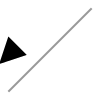

Eq(-3*sqrt(2)*x/4 + 3*sqrt(2)*y/4 - 21*sqrt(2)/4, 0)


Директриса


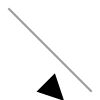

Eq(-3*sqrt(2)*x/4 - 3*sqrt(2)*y/4 - 9*sqrt(2)/4 - 9/4, 0)


Уравнение параболы


Eq((-sqrt(2)*(x + 5)/2 + sqrt(2)*(y - 2)/2)**2, 3*sqrt(2)*(x + 5) + 3*sqrt(2)*(y - 2))

In [5]:
p = Parabola(3, Point(-5, 2), Pi / 4)

print('Вершина')
display(p.vertex)

print('\nФокус')
display(p.focus)

print('\nУгол наклона (в радианах)')
display(p.get_angle)

eq_parabola = p.equation()
eq_directrix = p.dir_equation()
eq_axis_symmetry = p.ax_sym_equation()

print('\nОсь симметрии')
display(p.axis_symmetry)
display(eq_axis_symmetry)

print('\nДиректриса')
display(p.directrix)
display(eq_directrix)

print('\nУравнение параболы')
display(eq_parabola)

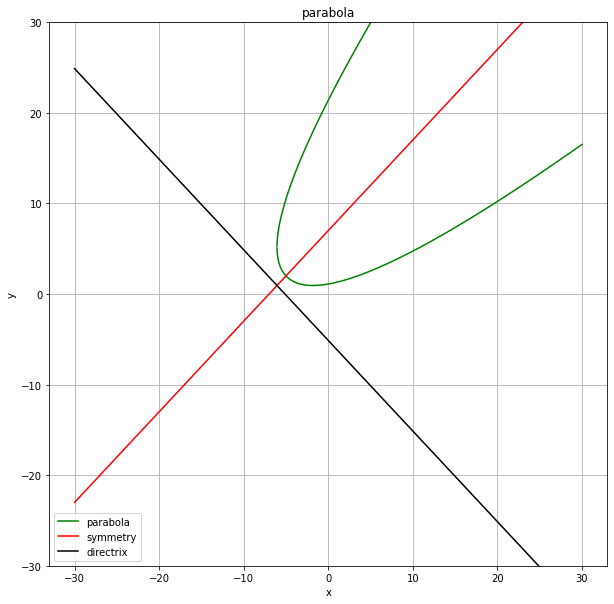

In [6]:
draw_parabola(p, xs=(-30, 30), ylim=(-30, 30))
plt.show()

### Индивидуальное задание
Построить экземпляр класса Parabola - параболу $x^{2} = 2py$ с заданным $p$, построить другую параболу путем поворота исходной параболы  на угол $\alpha$ радиан. Вывести на экран вершину, угол, фокус, ось симметрии и директрису обеих парабол. 

Использовать уравнения повернутой параболы, ее оси симметрии и директрисы для построения графиков в одной координатной плоскости. Парабола фиолетовая, ось симметрии зеленая, директриса черная, название графика Парабола, подписи осей $x$ и $y$.

Вариант N 157

Центр $Point2D\left(-4, -4\right)$, парабола вида $x^{2} = 2py$ с $p = 4$. Угол поворота $2 \pi / 3$.

Начальная парабола


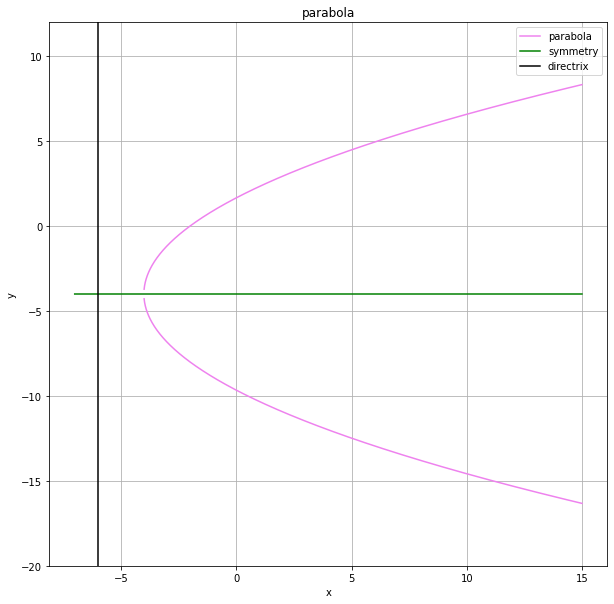

Повёрнутая парабола


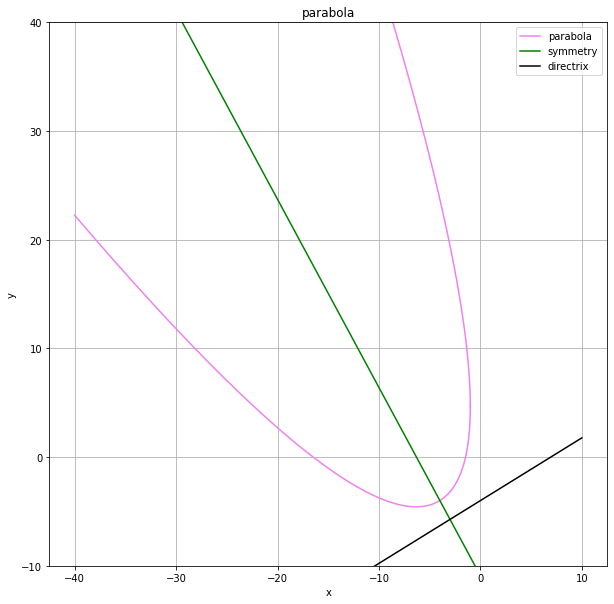

In [7]:
start_parabola = Parabola(4, Point(-4, -4))

print('Начальная парабола')
draw_parabola(start_parabola, xs=(-7, 15), ylim=(-20, 12), p_color='violet', sym_color='g', dir_color='black')
plt.show()

rotated_parabola = start_parabola.rotate(2 * Pi / 3)

print('Повёрнутая парабола')
draw_parabola(rotated_parabola, xs=(-40, 10), ylim=(-10, 40), p_color='violet', sym_color='g', dir_color='black')
plt.show()

Информация о параболах

--------------------
--------------------

Начальная парабола:

Вершина


Point2D(-4, -4)


Фокус


Point2D(-2, -4)


Угол наклона (в радианах)


0


Ось симметрии


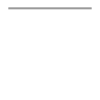

Eq(y + 4, 0)


Директриса


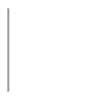

Eq(x + 6, 0)


Уравнение параболы


Eq((y + 4)**2, 8*x + 32)


--------------------

Повернутая парабола:

Вершина


Point2D(-4, -4)


Фокус


Point2D(-5, -4 + sqrt(3))


Угол наклона (в радианах)


2*pi/3


Ось симметрии


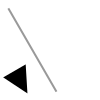

Eq(-sqrt(3)*x - y - 4*sqrt(3) - 4, 0)


Директриса


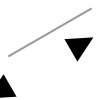

Eq(x - sqrt(3)*y - 4*sqrt(3), 0)


Уравнение параболы


Eq((-y/2 - sqrt(3)*(x + 4)/2 - 2)**2, -4*x + 4*sqrt(3)*(y + 4) - 16)

In [8]:
print('Информация о параболах\n')



print('--------------------')
print('--------------------')



print('\nНачальная парабола:')

print('\nВершина')
display(start_parabola.vertex)

print('\nФокус')
display(start_parabola.focus)

print('\nУгол наклона (в радианах)')
display(start_parabola.get_angle)

eq_parabola = start_parabola.equation()
eq_directrix = start_parabola.dir_equation()
eq_axis_symmetry = start_parabola.ax_sym_equation()

print('\nОсь симметрии')
display(start_parabola.axis_symmetry)
display(eq_axis_symmetry)

print('\nДиректриса')
display(start_parabola.directrix)
display(eq_directrix)

print('\nУравнение параболы')
display(eq_parabola)



print('\n--------------------\n')



print('Повернутая парабола:')

print('\nВершина')
display(rotated_parabola.vertex)

print('\nФокус')
display(rotated_parabola.focus)

print('\nУгол наклона (в радианах)')
display(rotated_parabola.get_angle)

eq_parabola = rotated_parabola.equation()
eq_directrix = rotated_parabola.dir_equation()
eq_axis_symmetry = rotated_parabola.ax_sym_equation()

print('\nОсь симметрии')
display(rotated_parabola.axis_symmetry)
display(eq_axis_symmetry)

print('\nДиректриса')
display(rotated_parabola.directrix)
display(eq_directrix)

print('\nУравнение параболы')
display(eq_parabola)

Хорасанджян Левон, вариант №157